<img src="cognorise.png" width="900" height="500">

In [ ]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pickle
import scipy.stats as stats



In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### On voit bien qu'il ya des valeurs manquantes dans les variables Cabin, Fare, Age.

In [6]:
#dealing with missing values in the age column
print(df['Age'].mode())
df['Age'].fillna(24,inplace=True)
df.isna().sum()

0    21.0
1    24.0
Name: Age, dtype: float64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#dealing with the missing value in the variable Fare
print(df['Fare'].mode())
df['Fare'].fillna(7.75, inplace=True)
df.isna().sum()

0    7.75
Name: Fare, dtype: float64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [8]:
print(df['Cabin'].mode())
df['Cabin'].fillna('B57', inplace=True)
df.isna().sum()

0    B57 B59 B63 B66
Name: Cabin, dtype: object


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Analyses descriptives univariées

In [9]:
# Analyse desciptive du jeu de données
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,28.982057,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.887063,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# Description des variables qualitatives
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,418,418
unique,418,2,363,77,3
top,"Kelly, Mr. James",male,PC 17608,B57,S
freq,1,266,5,327,270


<Axes: >

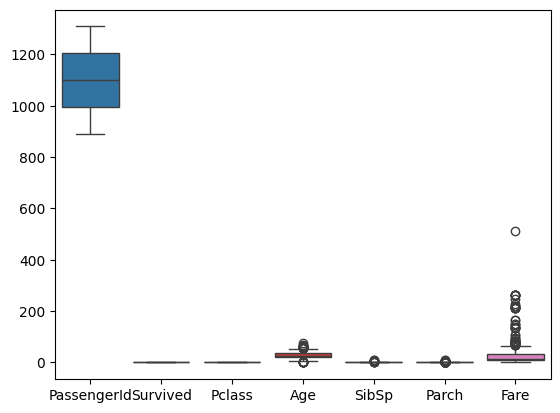

In [11]:
# Analyse descriptive des variables quantitatives
sns.boxplot(data=df)

([<matplotlib.patches.Wedge at 0x20ee3c22980>,
 [Text(-0.45695648023571717, 1.000595210447554, '0'),
  Text(0.4569564802357173, -1.000595210447554, '1')])

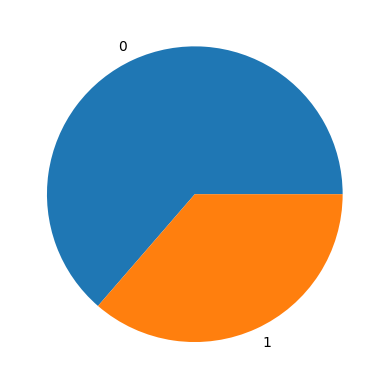

In [12]:
# Création d'un tableau de fréquences pour la variable "Survived"
freq_table = (df['Survived'].value_counts())/len(df)

freq_table

#Création d'un diagramme circulaire pour le tableua de fréquence


plt.pie(freq_table,labels=freq_table.index)

## Analyses bivariees

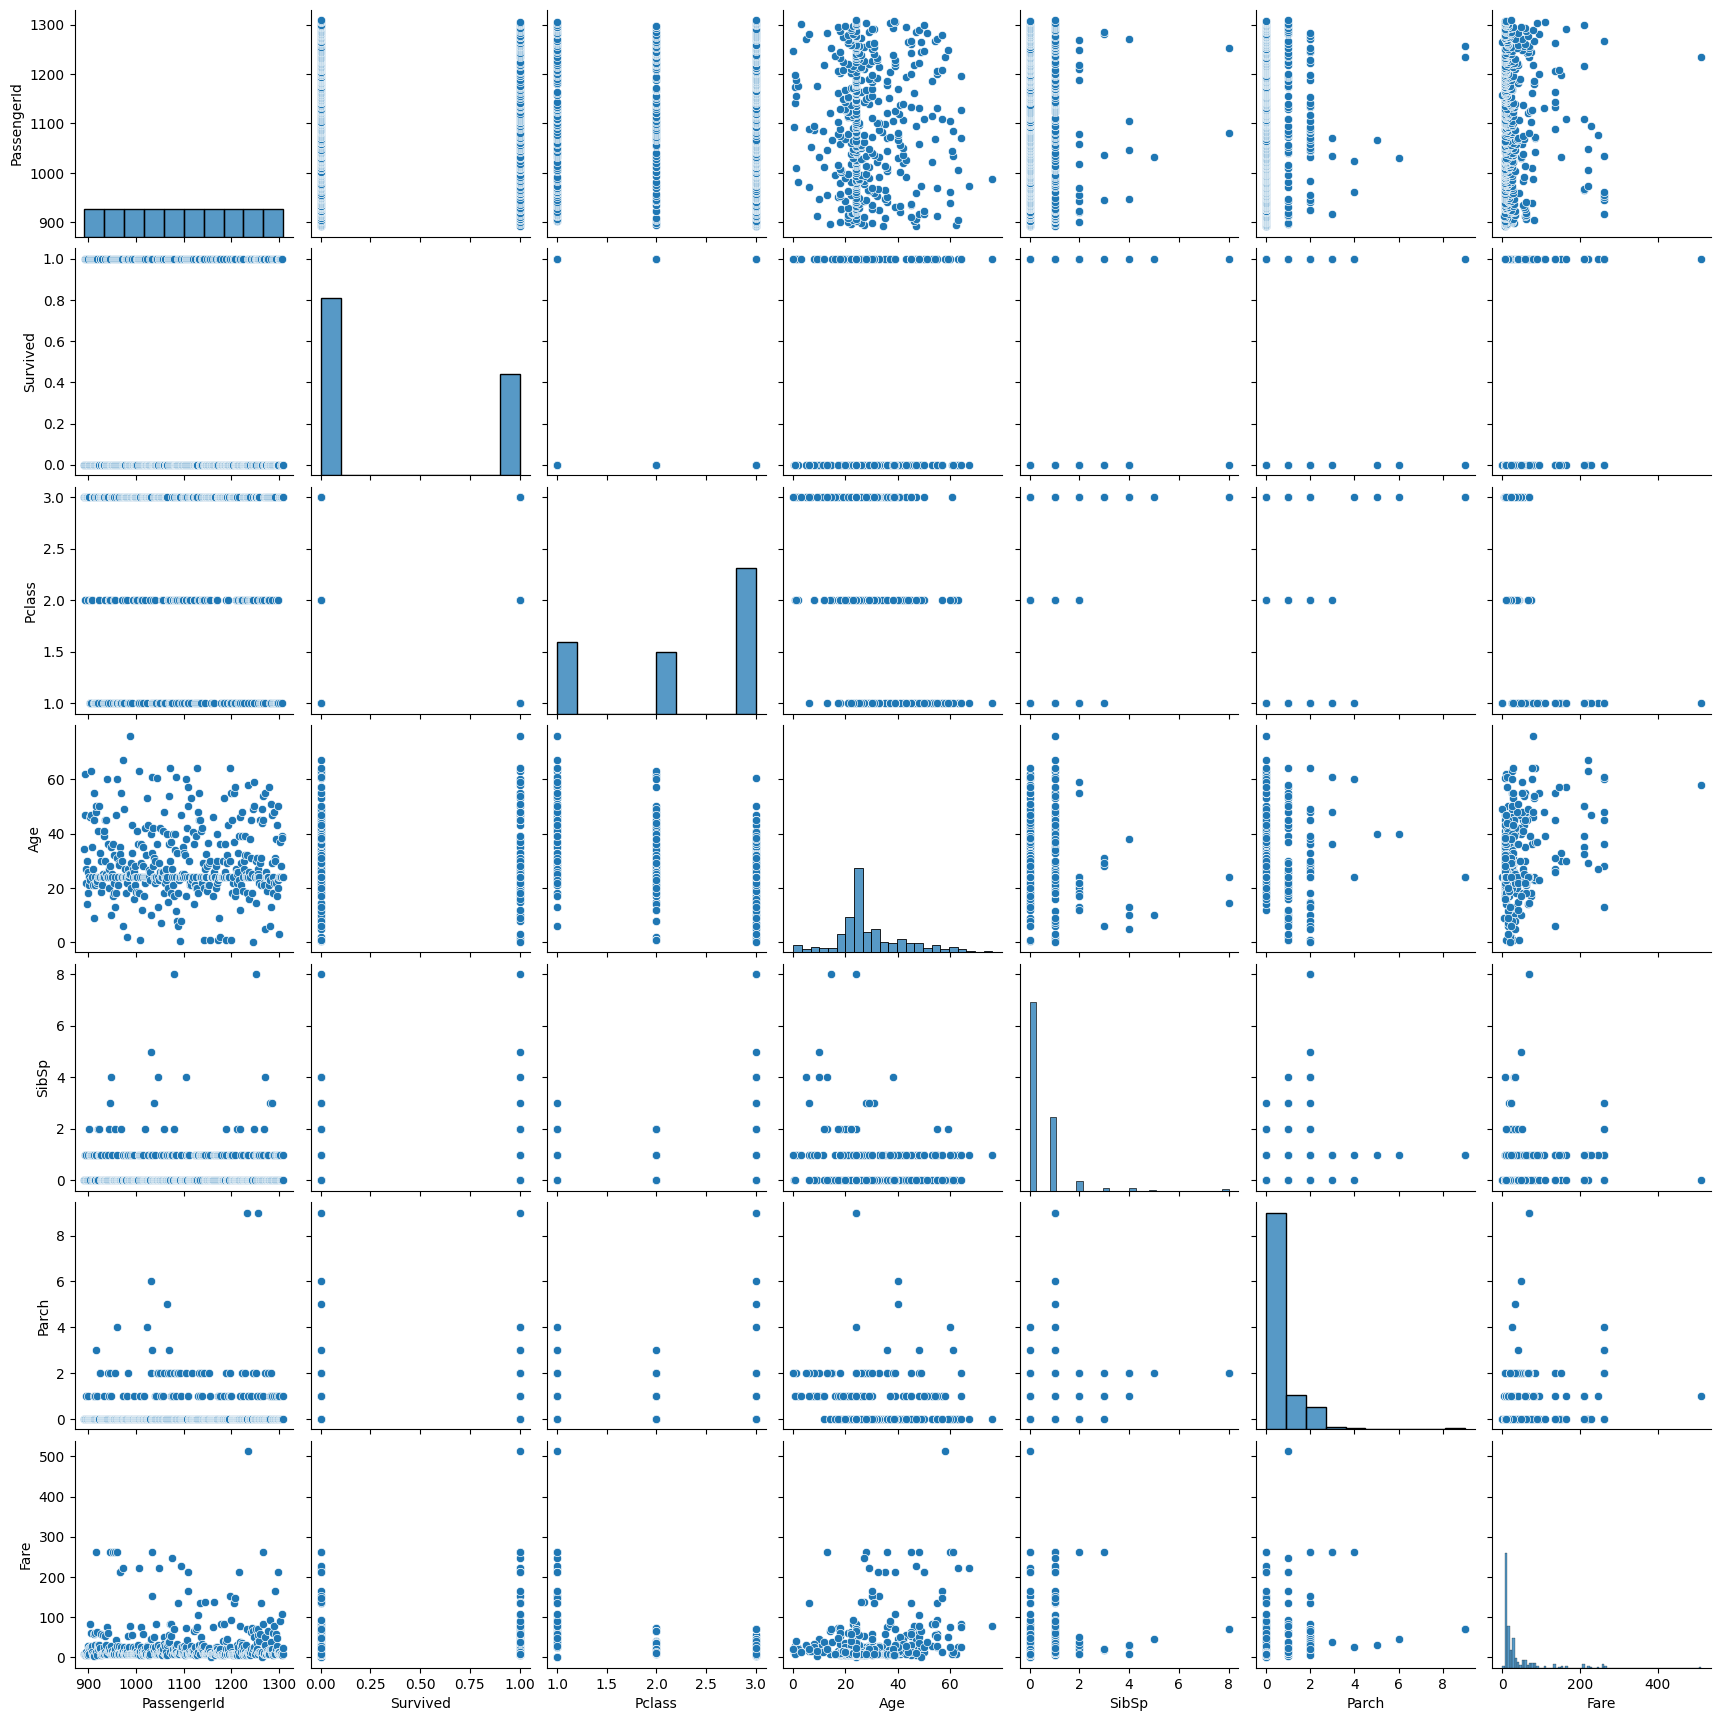

In [13]:
# Relation entre les variables quantitatives

sns.pairplot(df)

<Axes: >

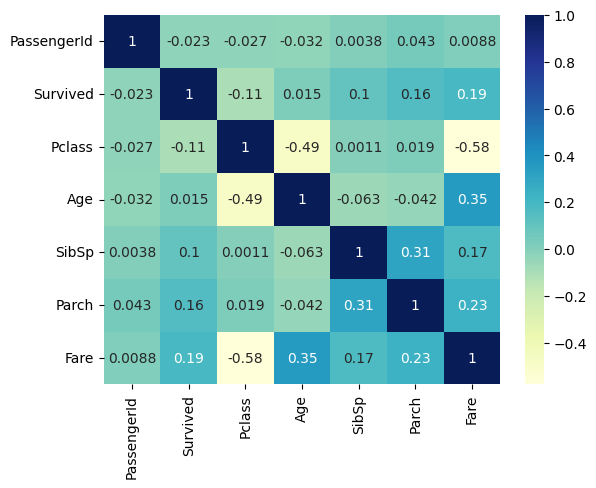

In [14]:
# Obtenir le tableau de corélation et la heatmap sur les variables quantitatives
dfquanti=df.drop(['Sex','Cabin', 'Ticket', 'Embarked', 'Name'], axis=1)
corr_matrix = dfquanti.corr()

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
#dfquanti

In [20]:
X=df[['Sex', 'Age', 'Pclass','Parch']]
y=df['Survived']
encoder=LabelEncoder()
X['Sex']=encoder.fit_transform(X['Sex'])

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_25336\524474833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex']=encoder.fit_transform(X['Sex'])


In [21]:
X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.3)

In [22]:
model_titanic= LogisticRegression()
model_titanic.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_ppred=model_titanic.predict(X_test)

In [25]:
confusion_matrix(y_ppred,y_test)

array([[84,  0],
       [ 0, 42]], dtype=int64)

In [24]:
accuracy_score(y_ppred,y_test)

1.0

<img src="thank.png" width="900" height="500">

<img src="end.png" width="900" height="500">